**LOAD THE CONTROL FILE**

In [0]:
# CONTROL  FILE 
from PIL import Image, ImageDraw


#upload file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  controluploaded = fn
  print "file uploaded with filename "+fn


**LOAD SAMPLE**

In [0]:
# MAIN FILE 

from PIL import Image, ImageDraw


#upload file
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  fileuploaded = fn
  print "file uploaded with filename "+fn
 

Saving set1-250a.JPG to set1-250a.JPG
file uploaded with filename set1-250a.JPG


**SET COORDS FOR THE RECTANGLE**

In [0]:
# set rectangle coords
a = 1150
b = 397
a1 = a+170
b1 = b+286



```
# This is formatted as code
```

**DRAW RECTANGLE ONTO SAMPLE IMAGE**

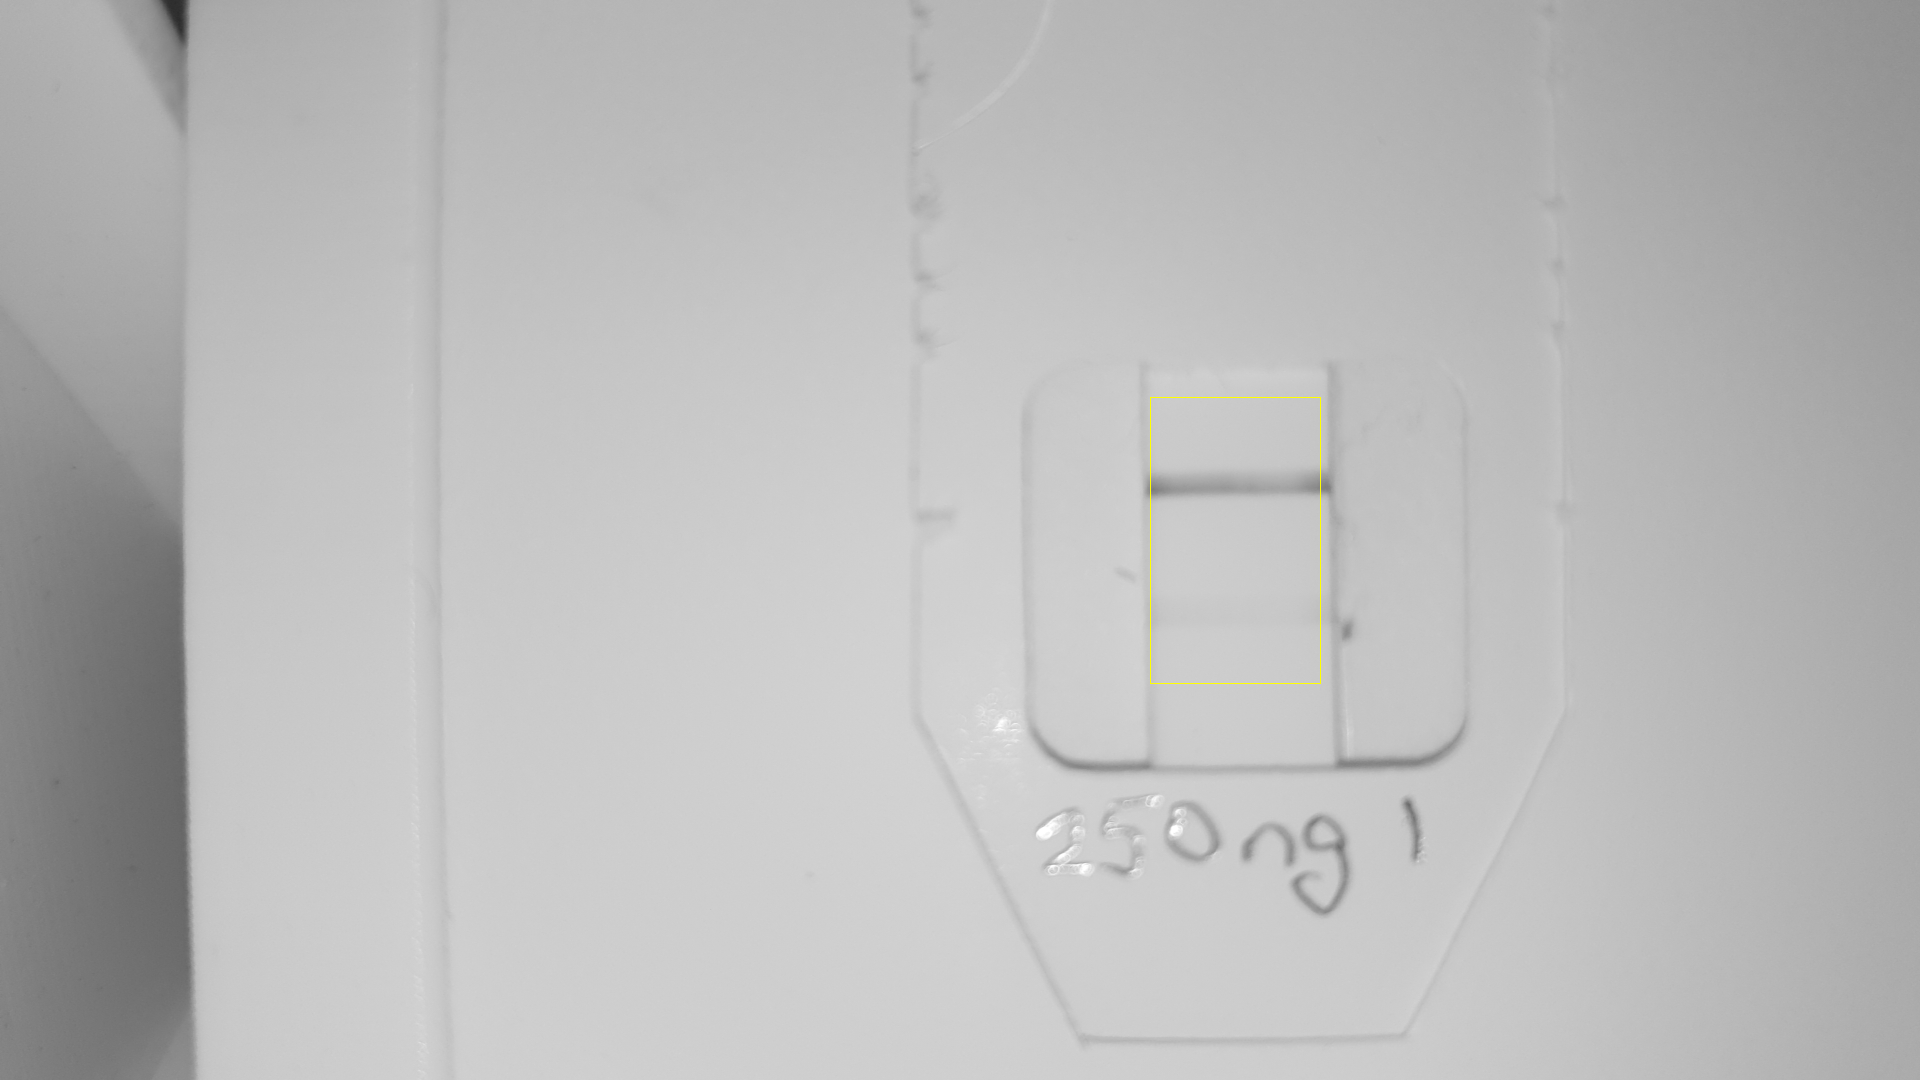

In [0]:
# we get the image and convert to greyscale
image = Image.open(fileuploaded)

#draw rectgnale on image
draw = ImageDraw.Draw(image)
draw.rectangle(((a, b), (a1, b1)), outline="yellow")

image

**CREATE CROPPED CONTROL IMAGE**

In [0]:
#crop a section of the CONTROL image
from IPython.display import display
from PIL import Image, ImageDraw

#load image without  rectangle
image = Image.open(controluploaded).convert('LA')

controlcropped = image.crop((a,b,a1,b1))
controlcropped.save('controlcropped.png')







**CREATE CROPPED SAMPLE IMAGE**

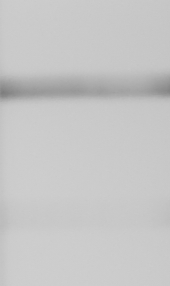

In [0]:
#crop a section of the image
from IPython.display import display

#load image without  rectangle
image = Image.open(fileuploaded).convert('LA')

cropped = image.crop((a,b,a1,b1))
cropped.save('cropped.png')
cropped

**CREATE MATRIX FROM EACH IMAGE AND PLOT**

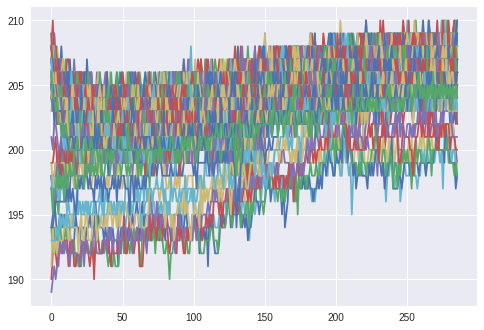

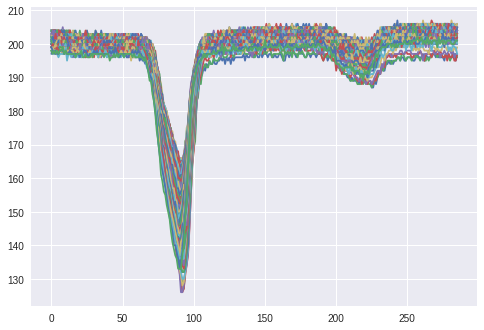

In [0]:
# create matrix from image
import scipy
matrix = scipy.misc.imread(name='cropped.png', flatten=True)
controlmatrix = scipy.misc.imread(name='controlcropped.png', flatten=True)


# show 3dgraph

import matplotlib.pyplot as plt

plt.plot(controlmatrix)
plt.show()
plt.plot(matrix)
plt.show()


![](https://)**CONVERT DATA TO POSITIVE AND AVERAGE EACH LINE ------ 
CREATE NEW MATRIX AFTER TAKING AWAY CONTROL**

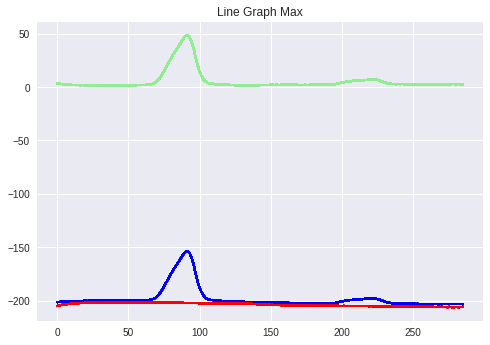

In [0]:
#  Let's loop through and get averages
import matplotlib.pyplot as plt
import plotly



i = 0
while i < len(matrix):
  matrix[i] = sum(matrix[i])/len(matrix[0])*-1
  controlmatrix[i] = sum(controlmatrix[i])/len(matrix[0])*-1
  i += 1
  
  
newmatrix = matrix-controlmatrix




plt.plot(matrix,color="blue", label="raw")
plt.plot(controlmatrix,color="red", label="control")
plt.plot(newmatrix,color="lightgreen", label="final")
plt.title("Line Graph Max")
plt.show()

**ONLY SHOW FINAL DATA**

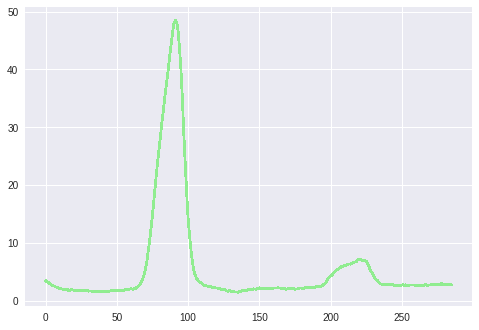

In [0]:
import matplotlib.pyplot as plt

import numpy as np





#plt.title("Line Graph Max"+str(highest))

plt.plot(newmatrix,color="lightgreen", label="final")
highest = newmatrix.max()


In [0]:
# FIND THE MAX OF EACH PEAK

A = newmatrix
B = A[:len(A)/2]
C = A[len(A)/2:]

high1 =  B.max()
high2 =  C.max()

print("PEAK 1: "+str(high1)+" - PEAK 2:"+str(high2))


PEAK 1: 48.47058 - PEAK 2:7.1058807
